# Student Details

- **Name**: Pranav Arora
- **Student #**: 202286040
- **Mail Id**: parora@mun.ca
- **Course**: COMP6934 Data Visualization
- **Assignment #**: 5

### Importing the libraries

In [2]:
import pandas as pd # version 2.2.0
import matplotlib.pyplot as plt # version 3.8.2
import seaborn as sns # version 0.13.2
import numpy as np # version 1.26.3

In [3]:
# import matplotlib

# print('Pandas version: ', pd.__version__)
# print('Matplotlib version: ', matplotlib.__version__)
# print('Seaborn version: ', sns.__version__)
# print('Numpy version: ', np.__version__)


### Reading the births.csv file

In [4]:
df = pd.read_csv('births.csv')

df

,year,month,time
0,2022,1,12:18
1,2022,1,15:25
2,2022,1,05:39
3,2022,1,01:22
4,2022,1,18:01
...,...,...,...
3675630,2022,12,00:21
3675631,2022,4,12:44
3675632,2022,5,13:53
3675633,2022,6,10:27


### Getting the minute of the day for every day in an year

In [5]:
df['hours'] = df['time'].str.split(':').str[0].astype(int)
df['minutes'] = df['time'].str.split(':').str[1].astype(int)
df['mod'] = df['hours'] * 60 + df['minutes'] # minute of the day
df

,year,month,time,hours,minutes,mod
0,2022,1,12:18,12,18,738
1,2022,1,15:25,15,25,925
2,2022,1,05:39,5,39,339
3,2022,1,01:22,1,22,82
4,2022,1,18:01,18,1,1081
...,...,...,...,...,...,...
3675630,2022,12,00:21,0,21,21
3675631,2022,4,12:44,12,44,764
3675632,2022,5,13:53,13,53,833
3675633,2022,6,10:27,10,27,627


### Getting the average number of births at each minute everyday

In [6]:
avg_mod = df.groupby('mod').size() / 365
avg_mod

mod
0       5.147945
1       5.726027
2       5.367123
3       5.410959
4       5.350685
          ...   
1435    5.547945
1436    5.375342
1437    5.512329
1438    5.536986
1439    6.035616
Length: 1440, dtype: float64

### Recreating the dataset to plot

In [7]:
df_mod = pd.DataFrame({'mod': range(len(avg_mod)), 'avg_births': avg_mod}).reset_index(drop=True)
df_mod

,mod,avg_births
0,0,5.147945
1,1,5.726027
2,2,5.367123
3,3,5.410959
4,4,5.350685
...,...,...
1435,1435,5.547945
1436,1436,5.375342
1437,1437,5.512329
1438,1438,5.536986


### Getting the polar axis angles

In [8]:
df_mod['angle'] = df_mod['mod'] / 1440 * 2 * 3.14159
df_mod

,mod,avg_births,angle
0,0,5.147945,0.000000
1,1,5.726027,0.004363
2,2,5.367123,0.008727
3,3,5.410959,0.013090
4,4,5.350685,0.017453
...,...,...,...
1435,1435,5.547945,6.261363
1436,1436,5.375342,6.265727
1437,1437,5.512329,6.270090
1438,1438,5.536986,6.274453


### Making data cyclic

In [9]:
df_mod.loc[1440, 'angle'] = 2.0 * 3.14159
df_mod.loc[1440, 'mod'] = 0
df_mod.loc[1440, 'avg_births'] = 5.147945

df_mod

,mod,avg_births,angle
0,0.0,5.147945,0.000000
1,1.0,5.726027,0.004363
2,2.0,5.367123,0.008727
3,3.0,5.410959,0.013090
4,4.0,5.350685,0.017453
...,...,...,...
1436,1436.0,5.375342,6.265727
1437,1437.0,5.512329,6.270090
1438,1438.0,5.536986,6.274453
1439,1439.0,6.035616,6.278817


### Getting the average line for the reference to plot

In [10]:
avg_line = df_mod['avg_births'].mean()
avg_line

6.99193672568517

## Answer 1

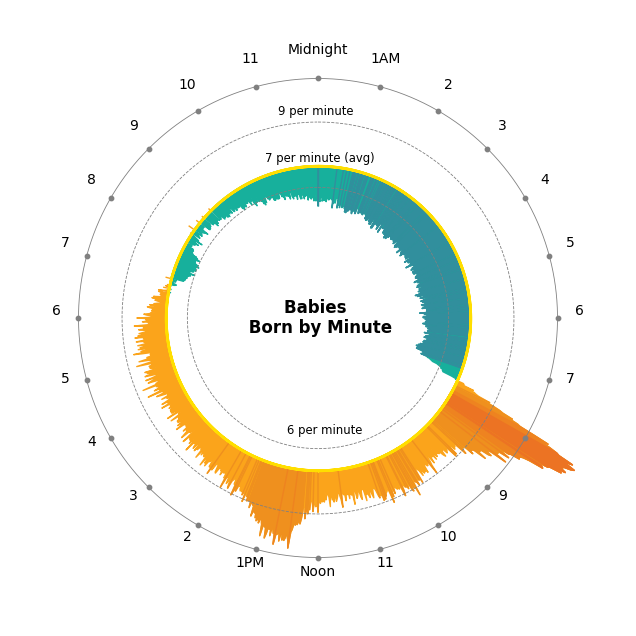

In [21]:
fig, ax = plt.subplots(figsize=(20,8), subplot_kw={'projection': 'polar'})

color_above = ['#fba41b', '#ef901e', '#ee8320', '#ec7323', '#e66024', '#db4f28','#d03d26', '#be3326', '#ad2a24', '#9b1e1f', '#8d181b', '#7b1515']

color_below = ['#17b09c', '#318f9d', '#2d7aa2', '#226192', '#094e81']

ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] < avg_line, color=color_below[0])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] < (avg_line-0.25*avg_line), color=color_below[1])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] < (avg_line-0.5*avg_line), color=color_below[2])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] < (avg_line-0.75*avg_line), color=color_below[3])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] == 0, color=color_below[4])

ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > avg_line, color=color_above[0])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 1.25*avg_line, color=color_above[1])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 1.50*avg_line, color=color_above[2])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 1.75*avg_line, color=color_above[3])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 2*avg_line, color=color_above[4])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 2.25*avg_line, color=color_above[5])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 2.5*avg_line, color=color_above[6])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 2.75*avg_line, color=color_above[7])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 3*avg_line, color=color_above[8])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 3.25*avg_line, color=color_above[9])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 3.5*avg_line, color=color_above[10])
ax.fill_between(df_mod['angle'], df_mod['avg_births'], avg_line, where=df_mod['avg_births'] > 3.75*avg_line, color=color_above[11])


ax.fill_between(df_mod['angle'], avg_line, avg_line, color='#ffde00', linewidth=2)

ax.set_xticks([x / 24 * 2.0 * 3.14159 for x in range(25)])
ax.set_xticklabels([])


ax.plot([x / 1440 * 2.0 * 3.14159 for x in range(1440)], [6 for _ in range(1440)] , color='gray', linestyle='--', linewidth=0.6)
ax.plot([x / 1440 * 2.0 * 3.14159 for x in range(1440)], [9 for _ in range(1440)] , color='gray', linestyle='--', linewidth=0.6)
ax.plot([x / 1440 * 2.0 * 3.14159 for x in range(1440)], [11 for _ in range(1440)] , color='gray', linewidth=0.6)

x = [x / 24 * 2.0 * 3.14159 for x in range(24)]
y = [11 for _ in range(24)]
labels = ['Midnight', '1AM', '2', '3', '4', '5', '6', '7', '', '9', '10', '11', 'Noon', '1PM', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
ax.scatter(x, y , color='gray', s=10)

for i, label in enumerate(labels):
    ax.text(x[i], y[i]+1, label, ha='center', va='bottom')

ax.set_rticks([6,7,9])

ax.text(13 / 24 * 2.0 * 3.14159, 5.5,'6 per minute', fontsize='small')

ax.text(22.75 / 24 * 2.0 * 3.14159, 7.55,'7 per minute (avg)', fontsize='small')

ax.text(23.25 / 24 * 2.0 * 3.14159, 9.5,'9 per minute', fontsize='small')

ax.text(0,0, 'Babies \n Born by Minute', va='center', ha='center', fontsize='large', fontweight='bold')
ax.set_yticklabels([])
ax.set_rlabel_position(0)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.spines['polar'].set_visible(False)
ax.grid(False)
plt.show()

### Reading the consoles.csv file

In [12]:
df_consoles = pd.read_csv('consoles.csv')
df_consoles = df_consoles.sort_values(by=['Company', 'Units sold']).reset_index(drop=True)
df_consoles

,Platform,Type,Company,Released,Units sold
0,Xbox Series X/S,Home,Microsoft,2020,21000000
1,Xbox,Home,Microsoft,2001,24000000
2,Xbox One,Home,Microsoft,2013,58000000
3,Xbox 360,Home,Microsoft,2005,84000000
4,Color TV-Game,Dedicated,Nintendo,1977,3000000
5,NES Classic Edition,Dedicated,Nintendo,2016,3560000
6,Famicom Disk System,Home console add-on,Nintendo,1986,4500000
7,Super NES Classic Edition,Dedicated,Nintendo,2017,5280000
8,Wii U,Home,Nintendo,2012,13560000
9,GameCube,Home,Nintendo,2001,21740000


### Getting the color codes for each of the company type

In [13]:
outer_colors = ['#5599cc', '#ea6727', '#83c143']
df_consoles.loc[df_consoles['Company']=='Microsoft', 'Color'] = outer_colors[0]
df_consoles.loc[df_consoles['Company']=='Nintendo', 'Color'] = outer_colors[1]
df_consoles.loc[df_consoles['Company']=='Sony', 'Color'] = outer_colors[2]
df_consoles


df_consoles

,Platform,Type,Company,Released,Units sold,Color
0,Xbox Series X/S,Home,Microsoft,2020,21000000,#5599cc
1,Xbox,Home,Microsoft,2001,24000000,#5599cc
2,Xbox One,Home,Microsoft,2013,58000000,#5599cc
3,Xbox 360,Home,Microsoft,2005,84000000,#5599cc
4,Color TV-Game,Dedicated,Nintendo,1977,3000000,#ea6727
5,NES Classic Edition,Dedicated,Nintendo,2016,3560000,#ea6727
6,Famicom Disk System,Home console add-on,Nintendo,1986,4500000,#ea6727
7,Super NES Classic Edition,Dedicated,Nintendo,2017,5280000,#ea6727
8,Wii U,Home,Nintendo,2012,13560000,#ea6727
9,GameCube,Home,Nintendo,2001,21740000,#ea6727


### Deleting the names of the least units sold to prevent the clutter

In [14]:
df_consoles.iloc[4:8, 0] = ''
df_consoles

,Platform,Type,Company,Released,Units sold,Color
0,Xbox Series X/S,Home,Microsoft,2020,21000000,#5599cc
1,Xbox,Home,Microsoft,2001,24000000,#5599cc
2,Xbox One,Home,Microsoft,2013,58000000,#5599cc
3,Xbox 360,Home,Microsoft,2005,84000000,#5599cc
4,,Dedicated,Nintendo,1977,3000000,#ea6727
5,,Dedicated,Nintendo,2016,3560000,#ea6727
6,,Home console add-on,Nintendo,1986,4500000,#ea6727
7,,Dedicated,Nintendo,2017,5280000,#ea6727
8,Wii U,Home,Nintendo,2012,13560000,#ea6727
9,GameCube,Home,Nintendo,2001,21740000,#ea6727


### Grouping for the inner circle

In [15]:
df_company = df_consoles.groupby('Company').sum().reset_index()
df_company

,Company,Platform,Type,Released,Units sold,Color
0,Microsoft,Xbox Series X/SXboxXbox OneXbox 360,HomeHomeHomeHome,8039,187000000,#5599cc#5599cc#5599cc#5599cc
1,Nintendo,Wii UGameCubeNintendo 64Game & WatchSNES/Super...,DedicatedDedicatedHome console add-onDedicated...,31986,903230000,#ea6727#ea6727#ea6727#ea6727#ea6727#ea6727#ea6...
2,Sony,PlayStation VitaPlayStation 5PlayStation Porta...,HandheldHomeHandheldHomeHomeHomeHome,14048,609090000,#83c143#83c143#83c143#83c143#83c143#83c143#83c143


## Answer 2

- I used two pie charts, the radius of the outer pie chart is less thus made it a donut shape. The inner space is taken by the inner pie chart

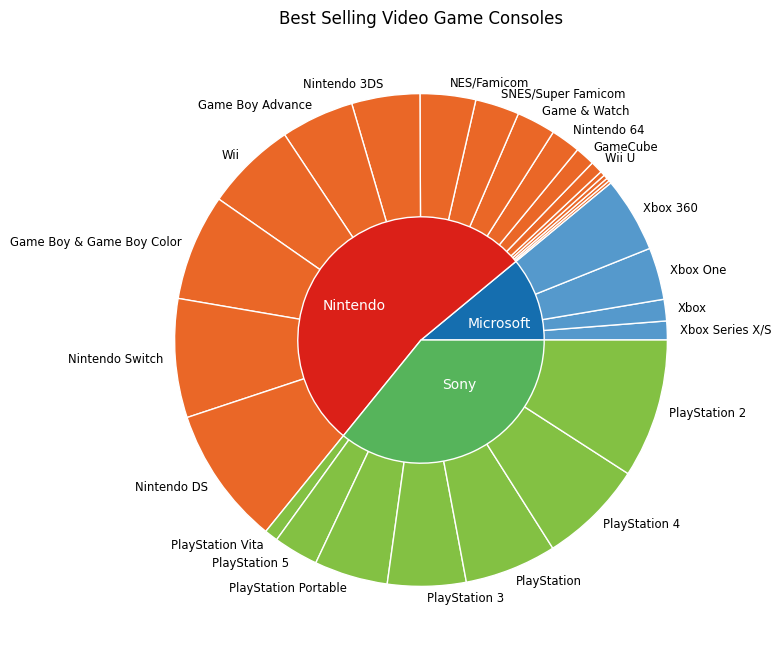

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))

inner_color = ['#156eaf', '#db2018', '#56b45b']

ax.pie(df_consoles['Units sold'], labels=df_consoles['Platform'],labeldistance=1.05, colors= df_consoles['Color'], wedgeprops=dict(edgecolor='w'), textprops=dict(fontsize='small'))
ax.pie(df_company['Units sold'], labels=df_company['Company'],labeldistance=0.4, radius=0.5, colors=inner_color, wedgeprops=dict(edgecolor='w'), textprops=dict(color='w'))

ax.set_title("Best Selling Video Game Consoles")
plt.show()



## Attributions

- Fill Between - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
- Polar Demo - https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html
- How to use fill between - https://www.geeksforgeeks.org/matplotlib-pyplot-fill_between-in-python/
- Spines - https://matplotlib.org/stable/api/spines_api.html
- Setting Polar Spines Demo - https://matplotlib.org/3.4.3/gallery/ticks_and_spines/spine_placement_demo.html
- Polar Projections - https://matplotlib.org/stable/api/projections/polar.html
- Plot without grid - https://stackoverflow.com/questions/6385458/polar-plot-without-grid-in-matplotlib
- Set Theta 0 Position - https://stackoverflow.com/questions/26906510/rotate-theta-0-on-matplotlib-polar-plot
- Nested Pie Charts - https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html
- Styling Pie Chart - https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
- Text Properties - https://matplotlib.org/stable/users/explain/text/text_props.html
- Axes Pie - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html
- Wedge - https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Wedge.html#matplotlib.patches.Wedge